<a href="https://colab.research.google.com/github/Kei-Kobayash/multiple_smiles/blob/main/LSM_revised2023_10_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSM smile/fearful 2023/10/15 newer code

CSV file should include the following columns:


*   Columns that are specified as arguments of the function cacl_slope(), such as "smile1_P7"
*   participant No.
*   EC
*   EC_group






# Compute slope (and intercept) of the function

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

model = linear_model.LinearRegression()

# df = pd.read_csv("lsm_demo.csv")

# row: participant, column: number (0, 1, 2, 3)

# Results list

x = [[0], [1], [2], [3]]


def calc_slope(csv_name, columns_of_interest):

  df = pd.read_csv(csv_name, encoding="shift-jis")
  unique_pars = df["participant No."].unique()

  #clear results
  coef_results = []
  intercept_results = []

  # List of participants
  unique_pars = df["participant No."].unique()
  pars_num = len(unique_pars)

  #y = df[df["participant"] == 1][["participant", "smile1"]].values.tolist()

  fig, ax1 = plt.subplots(1, 1)
  #fig, ax = plt.subplots(1, 1)

  df_demog = df[["participant No.", "EC"]]
  df_interest = df[columns_of_interest]
  df2 = pd.concat([df_demog, df_interest], axis = 1)

  for participant, n in zip(unique_pars, range(pars_num)):
    y = df2[df2["participant No."] == participant]
    y_list_all = y.values.flatten().tolist()
    y_list = y_list_all[2:6]

    two_d_y = [[i] for i in y_list]
    print(two_d_y)
    model.fit(x, two_d_y)

    coef = model.coef_.flatten().tolist()
    intercept = model.intercept_.tolist()

    coef_results.append(coef[0])
    intercept_results.append(intercept[0])

    ax1.scatter([0, 1, 2, 3], y_list)
    ax1.plot(x, model.predict(x))

  ### Creating result dataframe
  df_results = pd.DataFrame()
  df_results["id"] = unique_pars
  df_results["coef"] = coef_results
  df_results["intercept"] = intercept_results
  df_results["EC"] = df2["EC"]
  df_results["EC_group"] = df["EC_group"]
  return df_results

# Scatter plot (and create csv file)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def coef_scatter(title, df_results):
  fig, ax1 = plt.subplots(1,1, figsize = (3, 3))

  slope, intercept, r_value, p_value, std_err = linregress(df_results["EC"], df_results["coef"])

  ax1.scatter(df_results["EC"], df_results["coef"])
  ax1.set_xlabel("EC")
  ax1.set_ylabel("Coefficient")
  ax1.set_title(title, weight = "bold")
  ax1.spines["top"].set_visible(False)
  ax1.spines["right"].set_visible(False)

  ax1.set_xticks(np.arange(15, 40, 5))
  ax1.set_xlim(13, 35)

  trendline = slope * df_results["EC"] + intercept
  ax1.plot(df_results["EC"], trendline, color='black', label="Trendline")

  df_results.to_csv(title + ".csv")
  plt.savefig(title + ".png", dpi = 500, bbox_inches='tight')

# Fearful N170

In [4]:
df_results = calc_slope("Fearful_data_for_python2023.csv", ["fearful0_P7", "fearful1_P7", "fearful2_P7", "fearful3_P7"])

FileNotFoundError: ignored

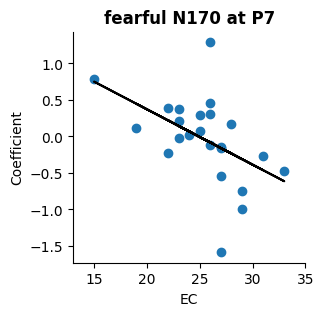

In [ ]:
coef_scatter("fearful N170 at P7", df_results)

[[-5.825], [-5.978], [-6.814], [-4.94]]
[[-1.783], [-1.443], [-1.076], [-3.12]]
[[-3.495], [-2.97], [-3.299], [-4.129]]
[[-8.285], [-8.145], [-9.41], [-6.851]]
[[-5.542], [-6.9], [-7.511], [-6.967]]
[[-10.955], [-11.661], [-13.297], [-13.113]]
[[-2.579], [-4.788], [-1.534], [-2.039]]
[[-2.852], [-1.851], [-2.666], [-3.31]]
[[-3.716], [-3.641], [-3.513], [-3.784]]
[[1.377], [1.164], [0.435], [0.578]]
[[-4.816], [-6.786], [-6.64], [-5.885]]
[[-6.092], [-9.306], [-7.734], [-8.553]]
[[-6.222], [-3.896], [-4.112], [-4.653]]
[[-5.204], [-5.137], [-3.702], [-6.562]]
[[-7.721], [-8.285], [-8.5], [-8.879]]
[[3.084], [2.421], [4.038], [3.778]]
[[-7.631], [-7.705], [-8.376], [-8.377]]
[[-9.983], [-9.829], [-9.465], [-9.582]]
[[-1.816], [-1.917], [-2.978], [-2.226]]
[[3.562], [1.355], [1.656], [-2.218]]
[[1.525], [0.854], [4.236], [6.214]]
[[-3.137], [-4.277], [-3.72], [-3.085]]
[[0.796], [-0.816], [1.364], [0.352]]


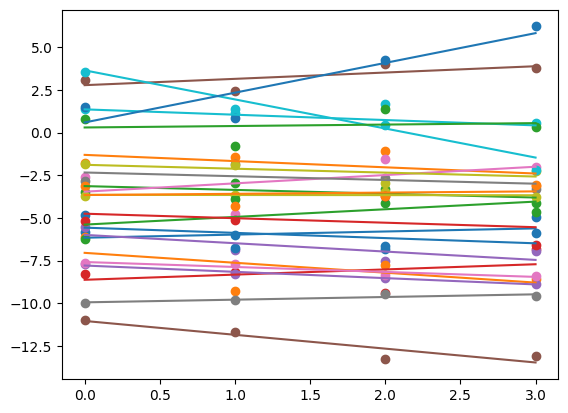

In [ ]:
df_results_P8 = calc_slope("Fearful_data_for_python2023.csv", ["fearful0_P8", "fearful1_P8", "fearful2_P8", "fearful3_P8"])

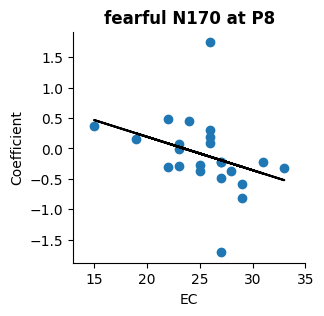

In [ ]:
coef_scatter("fearful N170 at P8", df_results_P8)

# Smile N170

[[-1.961], [-1.711], [-0.932], [-1.967]]
[[-3.125], [-3.247], [-6.51], [-4.051]]
[[-3.082], [-1.275], [-3.071], [-2.895]]
[[0.367], [-0.017], [1.613], [-0.665]]
[[0.728], [-0.615], [-0.6], [0.659]]
[[-3.236], [-5.705], [-6.023], [-4.793]]
[[-7.25], [-6.08], [-5.884], [-7.777]]
[[-0.546], [-1.133], [-2.481], [-1.291]]
[[-0.195], [-0.069], [0.085], [-1.874]]
[[-6.569], [-6.441], [-5.929], [-6.925]]
[[-3.91], [-5.546], [-4.173], [-2.205]]
[[-10.443], [-9.645], [-11.124], [-12.506]]
[[-2.832], [-4.996], [-2.839], [-4.395]]
[[-5.147], [-6.276], [-5.857], [-4.34]]
[[-12.502], [-14.378], [-13.791], [-13.145]]
[[-4.811], [-4.741], [-5.98], [-5.359]]
[[-2.871], [-3.595], [-3.21], [-2.647]]
[[4.785], [4.141], [4.275], [5.571]]
[[-3.194], [-1.509], [-3.33], [-2.908]]
[[4.907], [1.806], [3.655], [4.226]]
[[-1.205], [-1.759], [2.765], [2.611]]
[[-6.449], [-5.287], [-5.781], [-6.297]]
[[-0.365], [-0.919], [-0.448], [-2.097]]
[[-1.511], [0.625], [0.762], [1.623]]
[[-4.339], [-3.82], [-5.695], [-4.201

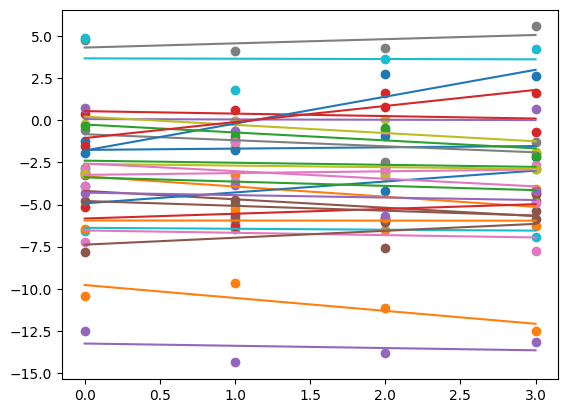

In [16]:
df_results_smile_N170_P7 = calc_slope("Smile#_120-140&180-200-.csv", ["smile0_P7", "smile1_P7", "smile2_P7", "smile3_P7"])

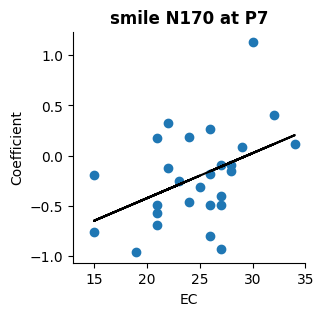

In [17]:
coef_scatter("smile N170 at P7", df_results_smile_N170_P7)

[[-2.134], [-3.167], [-2.117], [-2.891]]
[[-3.066], [-4.381], [-6.188], [-4.752]]
[[-1.648], [-0.809], [-2.392], [-2.666]]
[[0.348], [-0.972], [-1.673], [-2.619]]
[[2.137], [1.625], [1.375], [2.794]]
[[-6.366], [-8.052], [-8.197], [-8.833]]
[[-10.785], [-9.018], [-9.245], [-11.756]]
[[-4.976], [-5.342], [-6.94], [-6.338]]
[[-2.781], [-2.951], [-3.121], [-4.355]]
[[-7.346], [-7.804], [-7.254], [-8.377]]
[[-5.793], [-6.961], [-7.083], [-4.676]]
[[-11.548], [-10.023], [-11.562], [-11.67]]
[[-6.348], [-6.378], [-5.319], [-6.076]]
[[-3.649], [-2.936], [-3.224], [-2.677]]
[[-11.857], [-13.235], [-13.148], [-13.534]]
[[-1.795], [-2.298], [-2.996], [-2.072]]
[[-3.578], [-4.427], [-4.744], [-3.796]]
[[2.575], [-0.164], [0.058], [0.864]]
[[-5.495], [-3.751], [-6.624], [-5.881]]
[[3.546], [0.693], [1.227], [0.705]]
[[-3.484], [-4.491], [-1.221], [-0.813]]
[[-9.583], [-8.769], [-8.375], [-9.44]]
[[-5.557], [-5.292], [-6.124], [-5.601]]
[[-2.149], [-0.899], [-0.905], [-0.812]]
[[-3.17], [-3.336], [

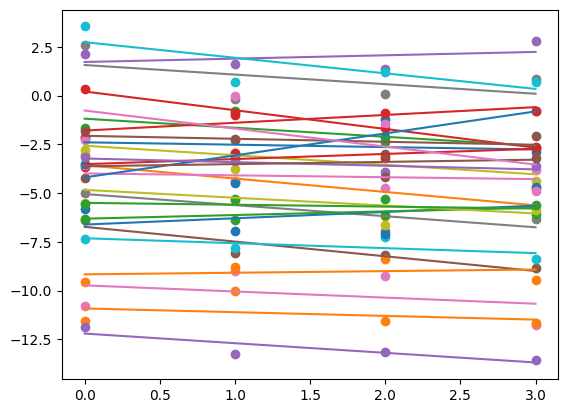

In [13]:
df_results_smile_P8 = calc_slope("Smile#_120-140&180-200-.csv", ["smile0_P8", "smile1_P8", "smile2_P8", "smile3_P8"])

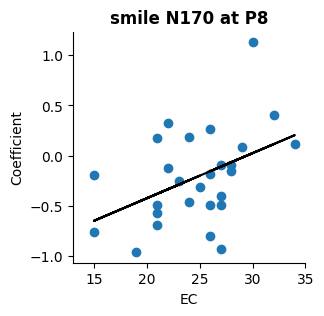

In [15]:
coef_scatter("smile N170 at P8", df_results_smile_P8)